<h1> Logistic Regression </h1>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

cancer=load_breast_cancer()
#print(cancer.data)

In [2]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(Xtrain,ytrain)

print('Accuracy on training set: {:.3f}'.format(log_reg.score(Xtrain,ytrain)))
print('Accuracy on test set: {:.3f}'.format(log_reg.score(Xtest,ytest)))

Accuracy on training set: 0.955
Accuracy on test set: 0.958


<b>Adjusting regularization:</b> <p>
    
From the cells below, we observe that we're actually getting a better model as we increase C hundredfold.<br>
That is, we are actually moving away from an underfit model. Again, if we decrease it to a hundredth of the<br>
original value, we get worse performance.

In [3]:
log_reg100=LogisticRegression(C=100, solver='liblinear')
log_reg100.fit(Xtrain,ytrain)

print('Accuracy on training set: {:.3f}'.format(log_reg100.score(Xtrain,ytrain)))
print('Accuracy on test set: {:.3f}'.format(log_reg100.score(Xtest,ytest)))

Accuracy on training set: 0.972
Accuracy on test set: 0.965


In [4]:
log_reg001=LogisticRegression(C=.01, solver='liblinear')
log_reg001.fit(Xtrain,ytrain)

print('Accuracy on training set: {:.3f}'.format(log_reg001.score(Xtrain,ytrain)))
print('Accuracy on test set: {:.3f}'.format(log_reg001.score(Xtest,ytest)))

Accuracy on training set: 0.934
Accuracy on test set: 0.930


.coef_ provides the coefficients of the features in the decision function of the Logistic Regression model.<br>
That is, in a binary classification problem, coef_ returns an (n,1) shaped vector of the 'trained' theta</br>
parameters.<p>
    
In the below plot, we can see the actual correlation between the features of the cancer dataset and the coefficients.

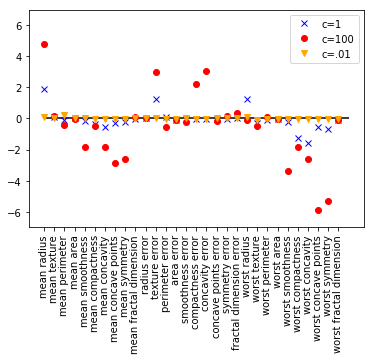

In [29]:
plt.plot(log_reg.coef_.T,'x',label='c=1',color='blue')
plt.plot(log_reg100.coef_.T,'o',label='c=100', color='red')
plt.plot(log_reg001.coef_.T,'v',label='c=.01', color='orange')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-7,7)
plt.legend()
plt.show()